## Docs

### Frequency Tokenizer

In [1]:
import tokenizers as tk

Read, preprocess then train

In [2]:
tokenizer = tk.FrequencyTokenizer()
tokenizer.process_data('samples/data.txt')
tokenizer.train()

Reading the data ...
Splitting the data ...


Tokenize 

In [3]:
tokenizer.tokenize("السلام عليكم")

['السلام', 'عليكم']

Encode as ids

In [4]:
tokenizer.encode("السلام عليكم")

[536, 829]

Decode back to tokens

In [5]:
tokenizer.decode([536, 829])

['السلام', 'عليكم']

### SentencePiece Tokenizer

Read, preprocess then train

In [6]:
tokenizer = tk.SentencePieceTokenizer()
tokenizer.process_data('samples/data.txt')
tokenizer.train()

Reading the data ...
Splitting the data ...


Tokenize 

In [7]:
tokenizer.tokenize("صباح الخير يا أصدقاء")

['▁صباح', '▁الخير', '▁يا', '▁أص', 'د', 'قاء']

Encode as ids

In [8]:
tokenizer.encode("صباح الخير يا أصدقاء")

[3777, 1424, 78, 423, 9962, 560]

Decode back to tokens

In [9]:
tokenizer.decode([3777, 1424, 78, 423, 9962, 560])

['▁صباح', '▁الخير', '▁يا', '▁أص', 'د', 'قاء']

### Auto Tokenizer

Read, preprocess then train

In [10]:
import tokenizers as tk
tokenizer = tk.AutoTokenizer()
tokenizer.process_data('samples/data.txt')

loading default vocab ...
Reading the data ...
Splitting the data ...


Tokenize 

In [11]:
tokenizer.tokenize("السلام عليكم")

['ال', '##سلام', 'علي', '##كم']

Encode as ids

In [12]:
tokenizer.encode("السلام عليكم")

[1, 3834, 8716, 4957]

Decode back to tokens

In [13]:
tokenizer.decode([1, 3834, 8716, 4957])

['ال', '##سلام', 'علي', '##كم']

### Random Tokenizer

In [1]:
import tokenizers as tk
tokenizer = tk.RandomTokenizer()
tokenizer.process_data('samples/data.txt')
tokenizer.train()

Reading the data ...
Splitting the data ...
Training ...


In [2]:
tokenizer.tokenize("السلام عليكم أيها الأصدقاء")

['السلا', '##م', 'علي', '##كم', 'أي', '##ها', 'ال', '##أصد', '##قاء']

### Large Files

We can use memory mapping to extract token's frequency for large files. It uses `mmap` to process chunks of the data at each iteration step. 

In [16]:
import time
import tokenizers as tk

In [17]:
# initialize
tokenizer = tk.FrequencyTokenizer()
tokenizer.process_data('samples/data.txt')

# calculating time with memory mapping
start_time = time.time()
tokenizer.train(large_file = True)
end_time = time.time()
time_with_mmap = end_time - start_time

# calculating time witout memory mapping
start_time = time.time()
tokenizer.train(large_file = False)
end_time = time.time()
time_without_mmap = end_time - start_time

1it [00:00,  4.28it/s]

Reading the data ...
Splitting the data ...


1it [00:00,  4.25it/s]


In [18]:
print('Time with memory mapping ', time_with_mmap)
print('Time without memory mapping ', time_without_mmap)

Time with memory mapping  0.3619396686553955
Time without memory mapping  0.3943755626678467


### Tokenization vs Segmentation 

We can use tokenization to segment words using a pretrained dictionary. This makes segmentation very fast as compared to
using libraries like `farasa`.

In [19]:
tokenizer = tk.AutoTokenizer()
start_time = time.time()
tokenizer.process_data('samples/data.txt')
out =tokenizer.tokenize(open('data/raw/train.txt').read())
end_time = time.time()
print(end_time - start_time)

loading default vocab ...
Reading the data ...
Splitting the data ...
9.40257453918457


In [20]:
tokenizer = tk.FrequencyTokenizer(segment = True)
start_time = time.time()
tokenizer.process_data('samples/data.txt')
end_time = time.time()
print(end_time - start_time)

Initializing Farasa


/home/zaid/.local/lib/python3.8/site-packages/farasa/__base.py:43: UserWarning: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.
  warnings.warn(


Reading the data ...
Segmenting the data ...
Splitting the data ...
47.5738046169281


### Export Models

Models can be saved for deployment and reloading.

In [21]:
tokenizer = tk.FrequencyTokenizer()
tokenizer.process_data('samples/data.txt')
tokenizer.train()
tokenizer.save_model('freq.pl')

Reading the data ...
Splitting the data ...
Saving as pickle file ...


load model without pretraining

In [22]:
tokenizer = tk.FrequencyTokenizer()
tokenizer.process_data('samples/data.txt')
tokenizer.load_model('freq.pl')

Reading the data ...
Splitting the data ...
Loading as pickle file ...


### Benchmarking

In [1]:
def calc_time(fun):
    start_time = time.time()
    fun().train()
    return time.time() - start_time

Training FrequencyTokenizer...
Training SentencePiece...
Training RandomTokenizer ...
Training AutoTokenizer...


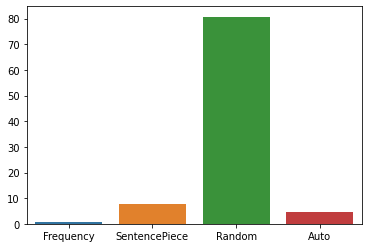

In [2]:
import tokenizers as tk
import time 
import seaborn as sns
import pandas as pd

running_times = {}

running_times['Frequency'] = calc_time(tk.FrequencyTokenizer)
running_times['SentencePiece'] = calc_time(tk.SentencePieceTokenizer)
running_times['Random'] = calc_time(tk.RandomTokenizer)
running_times['Auto'] = calc_time(tk.AutoTokenizer)

sns.barplot(data = pd.DataFrame.from_dict([running_times]))